**Recipe prediction Project**

Sara Badalbayev and Shiran Garabangi

Holon Institue of Technology

Data Science Course • Semester B • 16.06.2023

**Imports**

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from wordcloud import WordCloud

**Data Scraping**

In [9]:
#function to extract the links of the recipes 
MAX_RECIPES = 1000
def extract_links_from_url(url):
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(5) 

    links = set()

    while len(links) <= MAX_RECIPES: 
        ul_element = driver.find_element(By.XPATH, '//div[@class="grid grid-cols-2 gap-x-3 gap-y-6 sm:gap-x-6 sm:gap-y-6 md:grid-cols-4"]')
        li_elements = ul_element.find_elements(By.XPATH, './/div[@class="relative w-full"]')
        for li in li_elements:
            link_element = li.find_element(By.XPATH, './/a')
            link = link_element.get_attribute('href')
            links.add(link)
        driver.execute_script("window.scrollBy(0, 1000);")
        time.sleep(2) 

    driver.quit()
    return links

In [ ]:
url_categories = {
    'main': 'https://www.kitchenstories.com/en/search?filter={%22category%22:[%22main%22]}&type=recipe&orderBy=relevance',
    'dessert': 'https://www.kitchenstories.com/en/search?filter=%7B%22category%22%3A%5B%22dessert%22%5D%7D&type=recipe&orderBy=relevance',
    'snack': 'https://www.kitchenstories.com/en/search?filter=%7B%22category%22%3A%5B%22snack%22%5D%7D&type=recipe&orderBy=relevance',
    'beverages': 'https://www.kitchenstories.com/en/search?filter=%7B%22category%22%3A%5B%22beverages-and-smoothies%22%5D%7D&type=recipe&orderBy=relevance',
    'starter': 'https://www.kitchenstories.com/en/search?filter=%7B%22category%22%3A%5B%22starter%22%5D%7D&type=recipe&orderBy=relevance',
    'breakfast': 'https://www.kitchenstories.com/en/search?filter=%7B%22category%22%3A%5B%22breakfast%22%5D%7D&type=recipe&orderBy=relevance'
}

all_links = set()

# Extract links for each category
for category, url in url_categories.items():
    links = extract_links_from_url(url)
    all_links.update(links)

Columns of the data-frame

In [ ]:
titles = []
authors = []
difficulty_levels = []
preparation_time = []
baking_time = []
resting_time = []
tags = []
watchings=[]
calories=[]
fats=[]
proteins=[]
carbs=[]

**Web crawling**

Gathering information from Kitchen Stories

In [ ]:
#collect the data from the links
for url in  all_links:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
         
    try:
        title = soup.find('h1', {'data-test': 'recipe-title'}).text.strip()
    except:
        title = "Nan"
        
    try:
        author = soup.find('span', {'data-test': 'recipe-author-name'}).text.strip()
    except:
        author = "Nan"
    
    try:
        button = soup.find("button", class_="group flex items-center gap-1 text-base")
        watching=button.text.strip()
    except:
        watching="Nan"

    try:
        difficulty_level = soup.find('span', {'class': "text-base font-semibold sm:text-lg"}).text.strip()
    except:
        difficulty_level = "Nan"

    try:
        preparation = soup.find('div', {'class': "text-base font-semibold sm:text-lg"}).text.strip()
    except: 
        preparation = "Nan"

    try:
        time = soup.find_all('div', attrs={'class':'text-base font-semibold sm:text-lg'})
        baking = time[1].text.strip()
    except:
        baking = "Nan"

    try:
        resting = time[2].text.strip()
    except:
        resting = "Nan"

    try:
        tag = soup.find('ul', {"class": "flex flex-wrap text-lg"}).text.strip()
    except:
        tag = "Nan"

    try:
        nutrition_per_serving = soup.find_all('span', attrs={'class':'font-semibold'})
        calory = nutrition_per_serving[1].text.strip()
    except:
        calory = "Nan"

    try:
        fat = nutrition_per_serving[2].text.strip()
    except:
        fat = "Nan"

    try:
        protein = nutrition_per_serving[3].text.strip()
    except:
        protein = "Nan"

    try:
        carb = nutrition_per_serving[4].text.strip()
    except:
        carb = "Nan"
 
    titles.append(title)
    authors.append(author)
    watchings.append(watching)
    difficulty_levels.append(difficulty_level)
    preparation_time.append(preparation)
    baking_time.append(baking)
    resting_time.append(resting)
    tags.append(tag)
    calories.append(calory)
    fats.append(fat)
    proteins.append(protein)
    carbs.append(carb)

In [ ]:
# create the data frame 
df = pd.DataFrame({'title': titles,'author':authors,'watchings':watchings,
                   'difficulty':difficulty_levels,
                   'preparation':preparation_time, 'baking':baking_time, 'resting':resting_time,
                   'calory':calories,'fat':fats,'protein':proteins,'carb':carbs,'tags':tags})

df.to_csv('df_kitchen_stories.csv')

In [5]:
df

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags
0,Blue cheese and peach ciabatta salad,Nikoleta,41,Easy 👌,15 min,0 min,0 min,Nan,Nan,Nan,Nan,#vegetarian#starter#cheese#savory#dairy
1,3-ingredient peanut butter cookies,Devan Grimsrud,8.3k,Easy 👌,15 min,10 min,0 min,216,13 g,7 g,18 g,#snack#dessert#baking#puréeing#kid friendly#ve...
2,Low-carb lasagna,Team,28.3k,Medium 👍,45 min,30 min,0 min,626,38 g,51 g,13 g,#italian#kid friendly#weeknight dinner#main#ch...
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14.7k,Easy 👌,25 min,0 min,0 min,455,10 g,9 g,78 g,#italian#kid friendly#weeknight dinner#vegetar...
4,Creamy pasta with broccoli,Verena,80.7k,Easy 👌,35 min,0 min,0 min,620,27 g,20 g,60 g,#italian#weeknight dinner#vegetarian#valentine...
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,Easy 👌,20 min,0 min,0 min,Nan,Nan,Nan,Nan,#korean#weeknight dinner#vegetarian#vegan#spic...
4770,Steamed Fish蒸鱼,Linlin Wang,36,Easy 👌,10 min,10 min,0 min,Nan,Nan,Nan,Nan,#chinese#weeknight dinner#side#main#gluten fre...
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,Easy 👌,15 min,0 min,0 min,Nan,Nan,Nan,Nan,#weeknight dinner#vegetarian#vegan#main#gluten...
4772,Never forgetti spaghetti,Remek,148,Easy 👌,15 min,0 min,0 min,Nan,Nan,Nan,Nan,#italian#weeknight dinner#main#pasta#savory


**Data cleansing**
* removing the word min (minutes) in the preparation, baking and resting time and converting these columns to int values. 
* removing the letter g(gram) in the fat, protein and carb columns and converting these columns to int values. 
* removing the letter k from the watching and multiplying these values by 1000. Converting the column values to int. 
* chnaging the values of the difficulty level column to 1(easy), 2(medium), 3(hard)
* converting the tags columns to list and split by #

In [6]:
#print the number of nan values for each column
def print_nan_values(df): 
    for col in df.columns:
        print(col,':',(df[col]=='Nan').sum())

In [7]:
print_nan_values(df)

title : 0
author : 0
watchings : 0
difficulty : 0
preparation : 14
baking : 14
resting : 14
calory : 2312
fat : 2312
protein : 2312
carb : 2312
tags : 1


In [8]:
#function to remove the words in the columns and convert the values to int
def remove_word_and_convert_to_int(df, columns,word_to_remove):
    for column in columns:
        df[column] = df[column].apply(lambda x: int(x.replace(word_to_remove, '')) if x!='Nan' else x)
    return df

In [9]:
remove_word_and_convert_to_int(df, ['preparation', 'baking', 'resting'],'min')
remove_word_and_convert_to_int(df, ['fat', 'protein', 'carb'],'g')

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags
0,Blue cheese and peach ciabatta salad,Nikoleta,41,Easy 👌,15,0,0,Nan,Nan,Nan,Nan,#vegetarian#starter#cheese#savory#dairy
1,3-ingredient peanut butter cookies,Devan Grimsrud,8.3k,Easy 👌,15,10,0,216,13,7,18,#snack#dessert#baking#puréeing#kid friendly#ve...
2,Low-carb lasagna,Team,28.3k,Medium 👍,45,30,0,626,38,51,13,#italian#kid friendly#weeknight dinner#main#ch...
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14.7k,Easy 👌,25,0,0,455,10,9,78,#italian#kid friendly#weeknight dinner#vegetar...
4,Creamy pasta with broccoli,Verena,80.7k,Easy 👌,35,0,0,620,27,20,60,#italian#weeknight dinner#vegetarian#valentine...
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,Easy 👌,20,0,0,Nan,Nan,Nan,Nan,#korean#weeknight dinner#vegetarian#vegan#spic...
4770,Steamed Fish蒸鱼,Linlin Wang,36,Easy 👌,10,10,0,Nan,Nan,Nan,Nan,#chinese#weeknight dinner#side#main#gluten fre...
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,Easy 👌,15,0,0,Nan,Nan,Nan,Nan,#weeknight dinner#vegetarian#vegan#main#gluten...
4772,Never forgetti spaghetti,Remek,148,Easy 👌,15,0,0,Nan,Nan,Nan,Nan,#italian#weeknight dinner#main#pasta#savory


In [10]:
#function to change the difficulty column to numerical values 1,2,3
def change_difficulty_to_numerical(df):
    for i in range(len(df)):
        if df['difficulty'][i]=='Easy 👌':
            df['difficulty'][i]=1
        elif df['difficulty'][i]=='Medium 👍':
            df['difficulty'][i]=2
        elif df['difficulty'][i]=='Hard 💪':
            df['difficulty'][i]=3
    return df

In [11]:
change_difficulty_to_numerical(df)

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,#vegetarian#starter#cheese#savory#dairy
1,3-ingredient peanut butter cookies,Devan Grimsrud,8.3k,1,15,10,0,216,13,7,18,#snack#dessert#baking#puréeing#kid friendly#ve...
2,Low-carb lasagna,Team,28.3k,2,45,30,0,626,38,51,13,#italian#kid friendly#weeknight dinner#main#ch...
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14.7k,1,25,0,0,455,10,9,78,#italian#kid friendly#weeknight dinner#vegetar...
4,Creamy pasta with broccoli,Verena,80.7k,1,35,0,0,620,27,20,60,#italian#weeknight dinner#vegetarian#valentine...
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,1,20,0,0,Nan,Nan,Nan,Nan,#korean#weeknight dinner#vegetarian#vegan#spic...
4770,Steamed Fish蒸鱼,Linlin Wang,36,1,10,10,0,Nan,Nan,Nan,Nan,#chinese#weeknight dinner#side#main#gluten fre...
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,1,15,0,0,Nan,Nan,Nan,Nan,#weeknight dinner#vegetarian#vegan#main#gluten...
4772,Never forgetti spaghetti,Remek,148,1,15,0,0,Nan,Nan,Nan,Nan,#italian#weeknight dinner#main#pasta#savory


In [12]:
df['difficulty'].value_counts()

1    3962
2     743
3      69
Name: difficulty, dtype: int64

In [13]:
#Function to remove "k", multiply by 1000, and convert to int
def transform_watching(watching):
    if 'k' in watching:
        watching = watching.replace("k", "")
        return int(float(watching) * 1000)
    else:
        return int(watching)

In [14]:
df['watchings'] = df['watchings'].apply(lambda x: transform_watching(x))

In [15]:
df

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,#vegetarian#starter#cheese#savory#dairy
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,#snack#dessert#baking#puréeing#kid friendly#ve...
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,#italian#kid friendly#weeknight dinner#main#ch...
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,#italian#kid friendly#weeknight dinner#vegetar...
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,#italian#weeknight dinner#vegetarian#valentine...
...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,1,20,0,0,Nan,Nan,Nan,Nan,#korean#weeknight dinner#vegetarian#vegan#spic...
4770,Steamed Fish蒸鱼,Linlin Wang,36,1,10,10,0,Nan,Nan,Nan,Nan,#chinese#weeknight dinner#side#main#gluten fre...
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,1,15,0,0,Nan,Nan,Nan,Nan,#weeknight dinner#vegetarian#vegan#main#gluten...
4772,Never forgetti spaghetti,Remek,148,1,15,0,0,Nan,Nan,Nan,Nan,#italian#weeknight dinner#main#pasta#savory


In [16]:
# Convert NaN values in the 'tags' column to empty strings
df['tags'] = df['tags'].fillna('')

#split the tags by # and save as a list in the tags column
df['tags'] = df['tags'].apply(lambda x: x.split('#') if isinstance(x, str) else [])

# Remove empty tags from each list
df['tags'] = df['tags'].apply(lambda tags: [tag.strip() for tag in tags if tag.strip()])

Find the most popular tags 

In [17]:
# Flatten the lists of tags into a single list of words, excluding empty strings
words = [word for sublist in df['tags'] if isinstance(sublist, list) for word in sublist if word]

# Count the occurrences of each word
word_counts = Counter(words)

# Get the three most common words
top_words = word_counts.most_common(10)

# Print the three most popular words
for word, count in top_words:
    print(f"Word: {word}, Count: {count}")

Word: vegetarian, Count: 2198
Word: savory, Count: 2192
Word: kid friendly, Count: 2112
Word: comfort food, Count: 1973
Word: main, Count: 1904
Word: sweet, Count: 1903
Word: crowd pleaser, Count: 1815
Word: dairy, Count: 1601
Word: vegetables, Count: 1491
Word: weeknight dinner, Count: 1412


Adding 3 new columns to the DataFrame - vegetarian, savory, kids

In [18]:
df['savory'] = df['tags'].apply(lambda x: 1 if 'savory' in x else 0) # 1 if savory in tags else 0
df['vegetarian'] = df['tags'].apply(lambda x: 1 if 'vegetarian' in x else 0) # 1 if vegetarian in tags else 0
df['kids'] = df['tags'].apply(lambda x: 1 if 'kid' in x else 0) # 1 if kid in tags else 0

In [19]:
df

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags,savory,vegetarian,kids
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,"[vegetarian, starter, cheese, savory, dairy]",1,1,0
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,"[snack, dessert, baking, puréeing, kid friendl...",0,1,0
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,"[italian, kid friendly, weeknight dinner, main...",1,0,0
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,"[italian, kid friendly, weeknight dinner, vege...",1,1,0
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,"[italian, weeknight dinner, vegetarian, valent...",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,1,20,0,0,Nan,Nan,Nan,Nan,"[korean, weeknight dinner, vegetarian, vegan, ...",1,1,0
4770,Steamed Fish蒸鱼,Linlin Wang,36,1,10,10,0,Nan,Nan,Nan,Nan,"[chinese, weeknight dinner, side, main, gluten...",1,0,0
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,1,15,0,0,Nan,Nan,Nan,Nan,"[weeknight dinner, vegetarian, vegan, main, gl...",1,1,0
4772,Never forgetti spaghetti,Remek,148,1,15,0,0,Nan,Nan,Nan,Nan,"[italian, weeknight dinner, main, pasta, savory]",1,0,0


In [20]:
#replace Nan values in preparation, baking, resting columns with 0
def replace_nan(df):
    time_columns = ['preparation', 'baking', 'resting']
    df[time_columns] = df[time_columns].replace('Nan', 0)
    return df

In [21]:
replace_nan(df)

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags,savory,vegetarian,kids
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,"[vegetarian, starter, cheese, savory, dairy]",1,1,0
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,"[snack, dessert, baking, puréeing, kid friendl...",0,1,0
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,"[italian, kid friendly, weeknight dinner, main...",1,0,0
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,"[italian, kid friendly, weeknight dinner, vege...",1,1,0
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,"[italian, weeknight dinner, vegetarian, valent...",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,1,20,0,0,Nan,Nan,Nan,Nan,"[korean, weeknight dinner, vegetarian, vegan, ...",1,1,0
4770,Steamed Fish蒸鱼,Linlin Wang,36,1,10,10,0,Nan,Nan,Nan,Nan,"[chinese, weeknight dinner, side, main, gluten...",1,0,0
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,1,15,0,0,Nan,Nan,Nan,Nan,"[weeknight dinner, vegetarian, vegan, main, gl...",1,1,0
4772,Never forgetti spaghetti,Remek,148,1,15,0,0,Nan,Nan,Nan,Nan,"[italian, weeknight dinner, main, pasta, savory]",1,0,0


In [22]:
print_nan_values(df)

title : 0
author : 0
watchings : 0
difficulty : 0
preparation : 0
baking : 0
resting : 0
calory : 2312
fat : 2312
protein : 2312
carb : 2312
tags : 0
savory : 0
vegetarian : 0
kids : 0


Add new column - calory_flag

In [23]:
#if the recipe has a calort value, assign 1 to the column preparation_flag and 0 otherwise
df['calory_flag'] = df['calory'].apply(lambda x: 1 if x != 'Nan' else 0)

In [24]:
df.head()

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags,savory,vegetarian,kids,calory_flag
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,"[vegetarian, starter, cheese, savory, dairy]",1,1,0,0
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,"[snack, dessert, baking, puréeing, kid friendl...",0,1,0,1
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,"[italian, kid friendly, weeknight dinner, main...",1,0,0,1
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,"[italian, kid friendly, weeknight dinner, vege...",1,1,0,1
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,"[italian, weeknight dinner, vegetarian, valent...",1,1,0,1


In [25]:
#find the mean of the watchings column
df['watchings'].mean()

5389.837033933808

Adding new column - popular

In [26]:
#assign 1 to the column popular if the number of watchings is greater than the 5500 and 0 otherwise
POPULAR_THRESHOLD = 5500
df['popular'] = df['watchings'].apply(lambda x: 1 if x > POPULAR_THRESHOLD else 0)

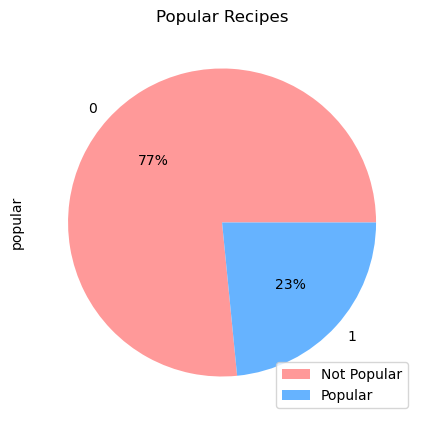

In [27]:
#find how many recipes are popular and show it on a pie chart
df['popular'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#ff9999','#66b3ff'], figsize=(5, 5))
plt.title('Popular Recipes')
plt.legend(labels=['Not Popular', 'Popular'])
plt.show()

In [28]:
df

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags,savory,vegetarian,kids,calory_flag,popular
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,"[vegetarian, starter, cheese, savory, dairy]",1,1,0,0,0
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,"[snack, dessert, baking, puréeing, kid friendl...",0,1,0,1,1
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,"[italian, kid friendly, weeknight dinner, main...",1,0,0,1,1
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,"[italian, kid friendly, weeknight dinner, vege...",1,1,0,1,1
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,"[italian, weeknight dinner, vegetarian, valent...",1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,Spicy Crunchy Garlic Tofu (aka Kkanpoong Tofu),Gary Pollard,42,1,20,0,0,Nan,Nan,Nan,Nan,"[korean, weeknight dinner, vegetarian, vegan, ...",1,1,0,0,0
4770,Steamed Fish蒸鱼,Linlin Wang,36,1,10,10,0,Nan,Nan,Nan,Nan,"[chinese, weeknight dinner, side, main, gluten...",1,0,0,0,0
4771,balsamic mushrooms with quinoa and garlicky gr...,Sophie Bruxner-Randall,211,1,15,0,0,Nan,Nan,Nan,Nan,"[weeknight dinner, vegetarian, vegan, main, gl...",1,1,0,0,0
4772,Never forgetti spaghetti,Remek,148,1,15,0,0,Nan,Nan,Nan,Nan,"[italian, weeknight dinner, main, pasta, savory]",1,0,0,0,0


**EDA** 

Most popular tags

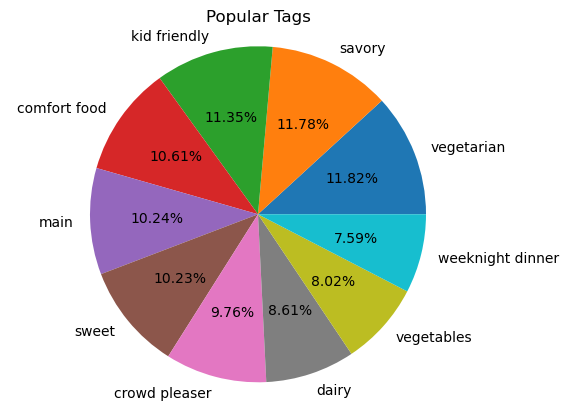

In [29]:
tags, counts = zip(*top_words)

plt.pie(counts, labels=tags, autopct='%1.2f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Popular Tags')
plt.show()


Mean Watchings for the 10 Most Popular Authors

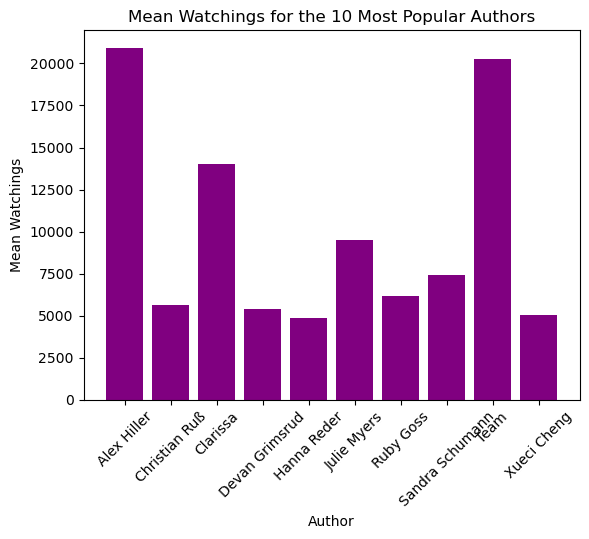

In [30]:
# Filter the DataFrame for the 10 most popular authors
popular_authors = df['author'].value_counts().head(10).index
filtered_df = df[df['author'].isin(popular_authors)]

# Calculate the mean watchings for each author
mean_watchings = filtered_df.groupby('author')['watchings'].mean()

plt.bar(mean_watchings.index, mean_watchings, color='purple')

plt.xlabel('Author')
plt.ylabel('Mean Watchings')
plt.title('Mean Watchings for the 10 Most Popular Authors')
plt.xticks(rotation=45)
plt.show()

**The relationship between some parameters and the watchings**

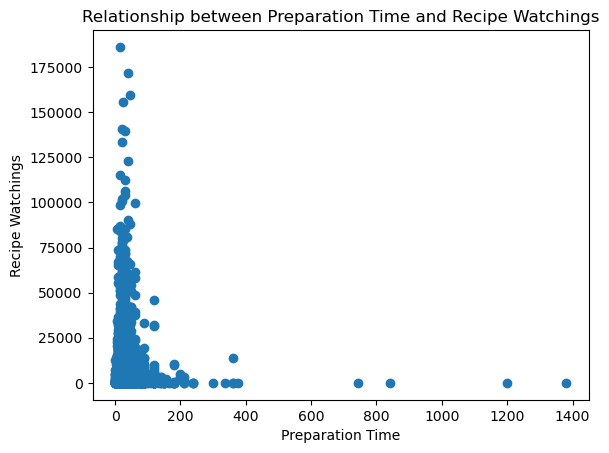

In [31]:
#scatter plot to see the relationship between the number of watchings and the time of preparation

plt.scatter(df['preparation'],df['watchings'])
plt.xlabel('Preparation Time')
plt.ylabel('Recipe Watchings')
plt.title('Relationship between Preparation Time and Recipe Watchings')
plt.show()

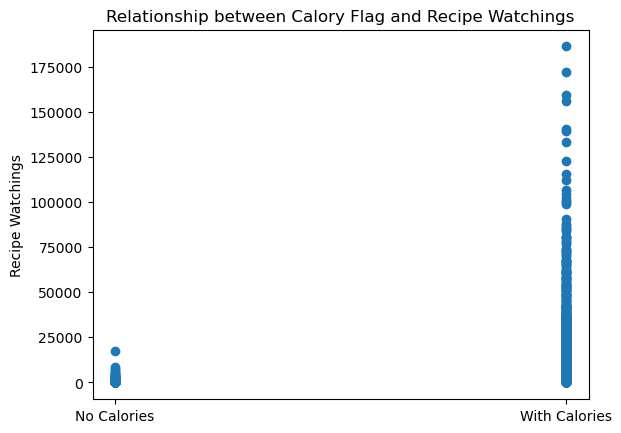

In [32]:
#scatter plot to see the relationship between the number of watchings and the calory_flag column with values 1 and 0
plt.scatter(df['calory_flag'],df['watchings'])
plt.xticks([0, 1], ['No Calories', 'With Calories'])
plt.ylabel('Recipe Watchings')
plt.title('Relationship between Calory Flag and Recipe Watchings')  
plt.show()

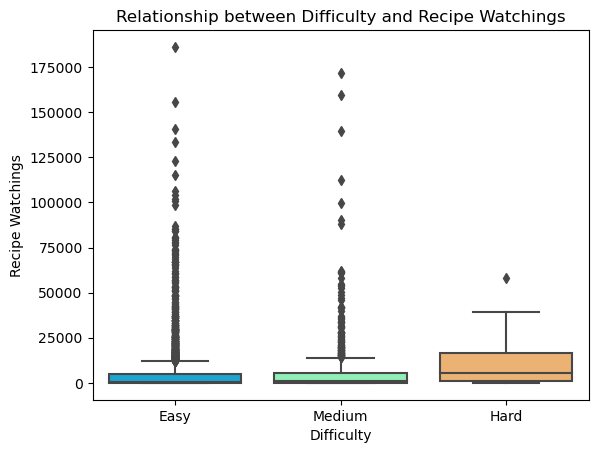

In [33]:
#boxplot to see the relationship between the number of watchings and the difficulty column with values 1,2,3
sns.boxplot(x='difficulty', y='watchings', data=df, palette='rainbow')
plt.xlabel('Difficulty')
plt.xticks([0, 1, 2], ['Easy', 'Medium', 'Hard'])
plt.ylabel('Recipe Watchings')
plt.title('Relationship between Difficulty and Recipe Watchings')
plt.show()

Adding new column - tags len to see the relationship between the numbers of tags and the watchings

In [43]:
df['tags_len'] = df['tags'].apply(lambda x: len(x))

In [44]:
df.head()

,title,author,watchings,difficulty,preparation,baking,resting,calory,fat,protein,carb,tags,savory,vegetarian,kids,calory_flag,popular,tags_len
0,Blue cheese and peach ciabatta salad,Nikoleta,41,1,15,0,0,Nan,Nan,Nan,Nan,"[vegetarian, starter, cheese, savory, dairy]",1,1,0,0,0,5
1,3-ingredient peanut butter cookies,Devan Grimsrud,8300,1,15,10,0,216,13,7,18,"[snack, dessert, baking, puréeing, kid friendl...",0,1,0,1,1,13
2,Low-carb lasagna,Team,28300,2,45,30,0,626,38,51,13,"[italian, kid friendly, weeknight dinner, main...",1,0,0,1,1,23
3,"5-ingredient spaghetti with fennel, tomato, an...",Devan Grimsrud,14700,1,25,0,0,455,10,9,78,"[italian, kid friendly, weeknight dinner, vege...",1,1,0,1,1,14
4,Creamy pasta with broccoli,Verena,80700,1,35,0,0,620,27,20,60,"[italian, weeknight dinner, vegetarian, valent...",1,1,0,1,1,20


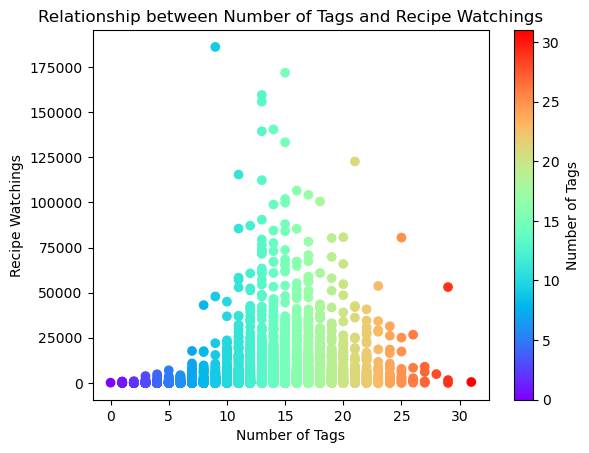

In [45]:
#scatter plot to see the relationship between the number of watchings and the number of tags

tags_len = df['tags_len']
watchings = df['watchings']

plt.scatter(tags_len, watchings, c=tags_len, cmap='rainbow')
plt.xlabel('Number of Tags')
plt.ylabel('Recipe Watchings')
plt.title('Relationship between Number of Tags and Recipe Watchings')
plt.colorbar(label='Number of Tags')

plt.show()

In [46]:
# Create a copy of the 'title' column
title_copy = df['title'].copy()

# Apply operations on the copy
title_copy = title_copy.apply(lambda x: [word.lower() for word in x.split(' ') if word.lower() not in ('and', 'with')] if isinstance(x, str) else [])
words = [word for sublist in title_copy for word in sublist]
word_counts = Counter(words)
top_words = word_counts.most_common(10)

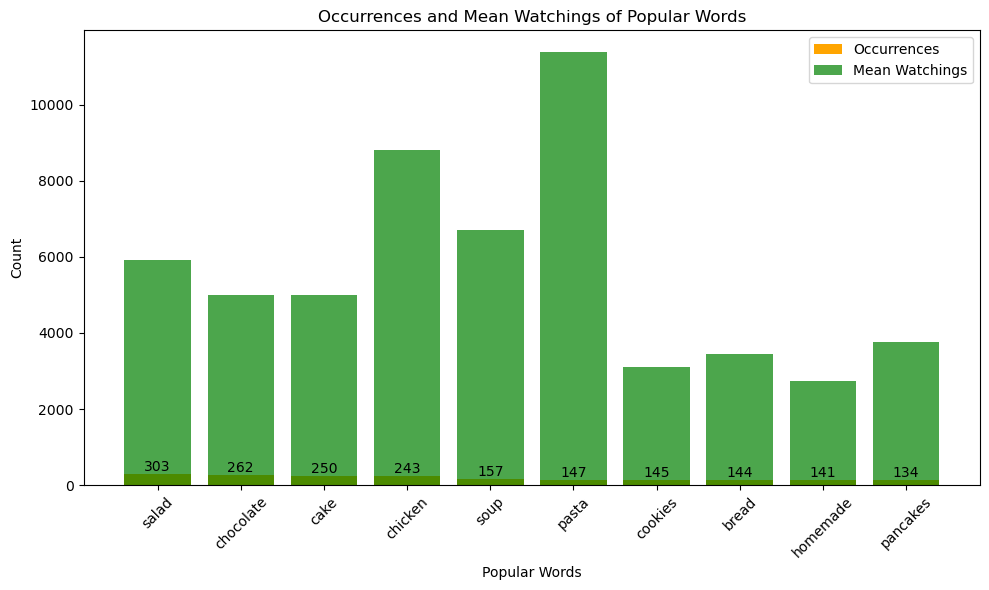

In [47]:
# Create a DataFrame for the top words
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Occurrences'])

mean_watchings = []
for word in top_words_df['Word']:
    word_watchings = df.loc[df['title'].str.lower().str.contains(word.lower()), 'watchings']
    mean_watchings.append(word_watchings.mean())

# Add the mean watchings to the DataFrame
top_words_df['Mean Watchings'] = mean_watchings

# Sort the DataFrame by occurrences
top_words_df = top_words_df.sort_values(by='Occurrences', ascending=False)

occurrences_color = 'orange'
mean_watchings_color = 'green'

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Occurrences'], color=occurrences_color, label='Occurrences')
plt.bar(top_words_df['Word'], top_words_df['Mean Watchings'], color=mean_watchings_color, alpha=0.7, label='Mean Watchings')

# Add data labels to the occurrences bars
for i, count in enumerate(top_words_df['Occurrences']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.xlabel('Popular Words')
plt.ylabel('Count')
plt.title('Occurrences and Mean Watchings of Popular Words')
plt.legend()
plt.tight_layout()
plt.show()

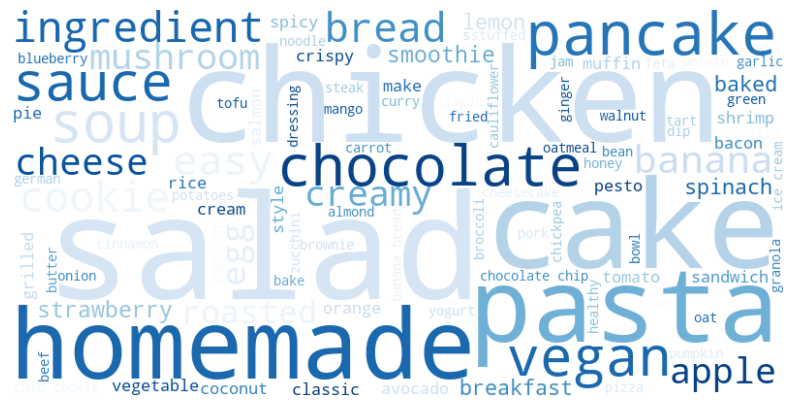

In [48]:
# Concatenate all the text data into a single string
text_data = " ".join(df['title'])

# Convert the text to lowercase
text_data = text_data.lower()

# Exclude specific words
exclude_words = ['and', 'with']
text_data = " ".join(word for word in text_data.split() if word not in exclude_words)

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    max_font_size=150,
    colormap='Blues'
).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Machine Learning**

In [38]:
#droping the columns that are not needed for the prediction
df_copy = df.drop(['title','author','watchings','tags',
                        'calory','fat','protein','carb'], axis=1)

In [50]:
df_copy

,difficulty,preparation,baking,resting,savory,vegetarian,kids,calory_flag,popular,tags_len
0,1,15,0,0,1,1,0,0,0,5
1,1,15,10,0,0,1,0,1,1,13
2,2,45,30,0,1,0,0,1,1,23
3,1,25,0,0,1,1,0,1,1,14
4,1,35,0,0,1,1,0,1,1,20
...,...,...,...,...,...,...,...,...,...,...
4769,1,20,0,0,1,1,0,0,0,16
4770,1,10,10,0,1,0,0,0,0,14
4771,1,15,0,0,1,1,0,0,0,12
4772,1,15,0,0,1,0,0,0,0,5


Random Forest Classifier

In [79]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [2, 4, 8, 15],
                'min_samples_leaf': [1, 2, 4, 8],
                'max_features': [2, 4, 6, 8],
                'n_estimators': [10, 50, 100, 150,200]}

# Split the data into training and testing sets
X = df_copy.drop('popular', axis=1)
y = df_copy['popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Classifier
rfc = RandomForestClassifier()

# Perform grid search cross-validation
grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

# Get the best parameters found during grid search
best_params = grid_rfc.best_params_

# Use the best model to make predictions on the test set
best_model = grid_rfc.best_estimator_
rfc_pred = best_model.predict(X_test)

# Get feature importances
importances = best_model.feature_importances_

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the importances in descending order
sorted_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important parameter
most_important_parameter = sorted_df.iloc[0]['Feature']
print(f"The most important feature is: {most_important_parameter}")

# Print the chosen hyperparameters
print("\nChosen Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

The most important feature is: calory_flag

Chosen Hyperparameters:
max_depth: 8
max_features: 4
min_samples_leaf: 8
n_estimators: 10


In [80]:
#The accuracy of the prediction
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       732
           1       0.54      0.60      0.56       223

    accuracy                           0.79       955
   macro avg       0.70      0.72      0.71       955
weighted avg       0.79      0.79      0.79       955



Decision Tree Classifier

In [54]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 4, 8, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [2, 4, 6, 8]
}

# Create the decision tree classifier
dtree = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_dtree = grid_search.best_estimator_

# Make predictions using the best model
dtree_pred = best_dtree.predict(X_test)

# Get feature importances
importances = best_dtree.feature_importances_

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the importances in descending order
sorted_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the most important parameter
most_important_parameter = sorted_df.iloc[0]['Feature']
print(f"The most important feature is: {most_important_parameter}")

# Get the chosen hyperparameters
best_params = grid_search.best_params_
print("\nChosen Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

The most important parameter is: calory_flag

Chosen Hyperparameters:
max_depth: 15
max_features: 6
min_samples_leaf: 4


In [61]:
#The accuracy of the prediction
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       732
           1       0.53      0.68      0.59       223

    accuracy                           0.78       955
   macro avg       0.71      0.75      0.72       955
weighted avg       0.81      0.78      0.79       955



Logistic Regression

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Create the logistic regression model
logmodel = LogisticRegression()

# Perform grid search cross-validation
grid = GridSearchCV(logmodel, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Retrieve the best model
best_logmodel = grid.best_estimator_

# Make predictions using the best model
log_pred = best_logmodel.predict(X_test)

In [112]:
# Get feature importances
importances = best_logmodel.coef_[0]

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the importances in descending order
sorted_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the most important parameter
most_important_parameter = sorted_df.iloc[0]['Feature']

# Print the most important parameter
print(f"The most important feature is: {most_important_parameter}")

The most important feature is: calory_flag


In [68]:
# Get the chosen hyperparameters
best_params = grid.best_params_
print("\nChosen Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Chosen Hyperparameters:
C: 100
max_iter: 100
penalty: l2
solver: lbfgs


In [69]:
#find the accuracy of the prediction
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       732
           1       0.61      0.41      0.49       223

    accuracy                           0.80       955
   macro avg       0.72      0.67      0.68       955
weighted avg       0.78      0.80      0.79       955



SVM classifier

In [72]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
svm_pred = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.766 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.766 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.766 total time=   1.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.764 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.766 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [82]:
# Get the chosen hyperparameters
best_params = grid.best_params_
print("\nChosen Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Chosen Hyperparameters:
C: 1000
gamma: 0.0001
kernel: rbf


In [83]:
#find the accuracy of the prediction
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       732
           1       0.51      0.57      0.54       223

    accuracy                           0.77       955
   macro avg       0.69      0.70      0.69       955
weighted avg       0.78      0.77      0.78       955



Confusion Matrix

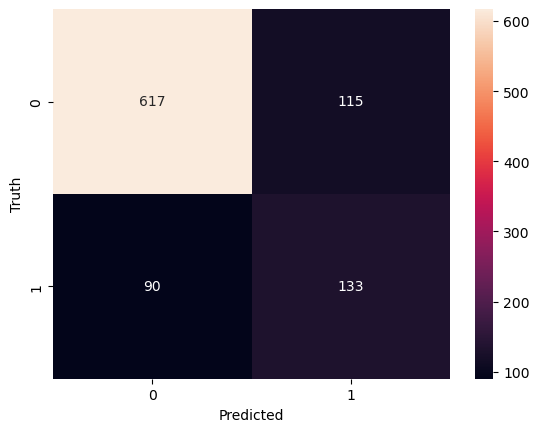

In [84]:
#plot the confusion matrix for the random forest classifier
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

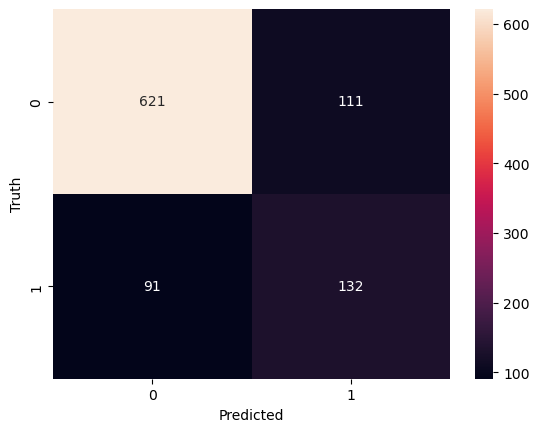

In [85]:
#plot the confusion matrix for the decision tree classifier
cm = confusion_matrix(y_test, dtree_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

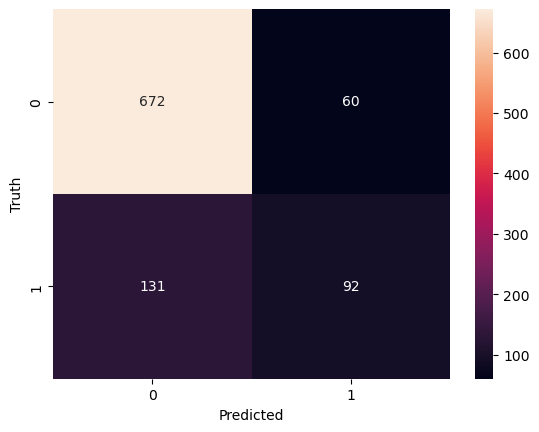

In [86]:
#plot the confusion matrix for the logistic regression classifier
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

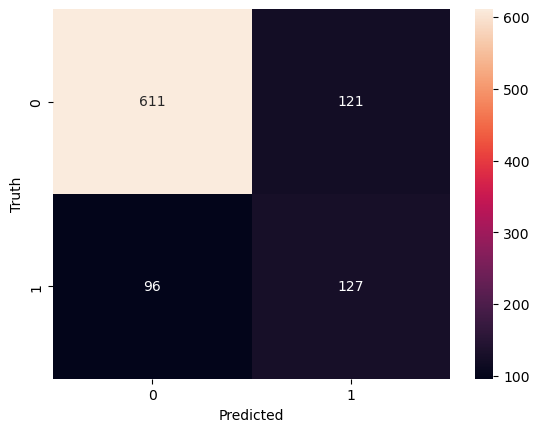

In [87]:
#plot the confusion matrix for the support vector machine classifier
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()